<a href="https://colab.research.google.com/github/kjm90110/course-manage-program/blob/master/4_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AdaBoost**

AdaBoost는 여러 개의 약한 학습기(weak learner) 를 순차적으로 학습시켜
이들을 **가중합(weighted sum) 하여 하나의 강한 분류기(strong classifier)** 를 만드는 앙상블 알고리즘이다.

#### **핵심 아이디어**

- 처음에는 모든 데이터에 동일한 가중치

- 이전 모델이 틀린 데이터의 가중치를 증가

- 다음 모델은 틀린 데이터에 더 집중해서 학습

- 최종 예측은 각 모델의 가중 투표(weighted vote)

> 보통 Decision Tree의 깊이 1 (Decision Stump) 를 약한 학습기로 사용

## 1. AdaBoost 알고리즘 흐름


1. 모든 샘플 가중치 초기화

2. 약한 학습기

3. 오분류율 계산

4. 학습기 가중치 계산

5. 샘플 가중치 업데이트

6. 틀린 샘플 → 가중치 증가

7. 맞은 샘플 → 가중치 감소

8. 최종 예측

## 2. 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
X, y = load_wine(return_X_y=True)

# 표준화 (PCA & AdaBoost 안정성 향상)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train / test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2026
)

In [ ]:
# 약한 학습기
base_estimator = DecisionTreeClassifier(
    max_depth=1,
    random_state=2026
)

In [ ]:
# AdaBoost model
ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=2026
)

In [ ]:
# 학습
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=2026),
                   learning_rate=0.5, n_estimators=100, random_state=2026)

In [ ]:
# 성능 평가
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9166666666666666


## PCA 기반 데이터 분포 시각화

In [ ]:
# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

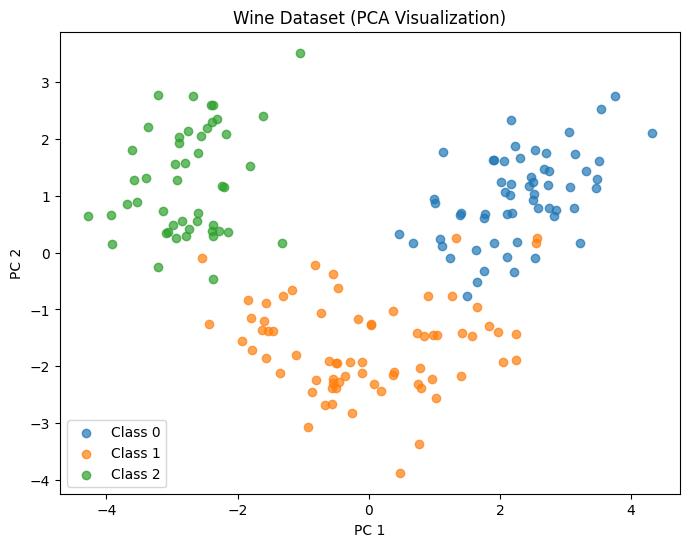

In [ ]:
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(
        X_pca[y == label, 0],
        X_pca[y == label, 1],
        label=f"Class {label}",
        alpha=0.7
    )

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Wine Dataset (PCA Visualization)")
plt.legend()
plt.show()

## AdaBoost 단계별 성능 변화 시각화

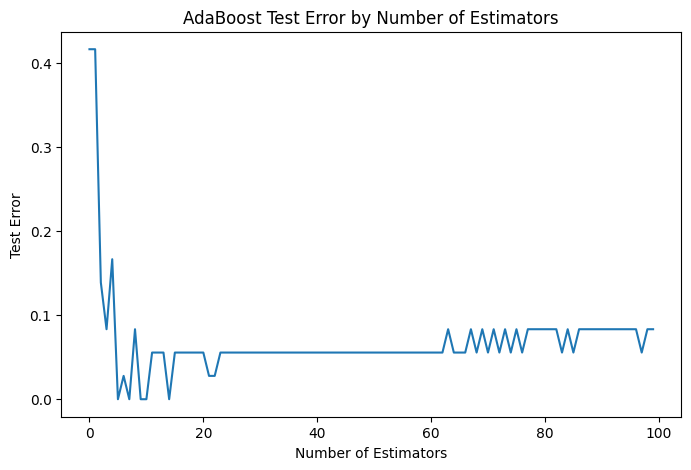

In [ ]:
test_errors = []

for y_stage_pred in ada.staged_predict(X_test):
    error = 1 - accuracy_score(y_test, y_stage_pred)
    test_errors.append(error)

plt.figure(figsize=(8, 5))
plt.plot(test_errors)
plt.xlabel("Number of Estimators")
plt.ylabel("Test Error")
plt.title("AdaBoost Test Error by Number of Estimators")
plt.show()

> 약한 학습기의 수가 증가함에 따라 테스트 오차가 점진적으로 감소하며,
AdaBoost가 반복 학습을 통해 성능을 향상시키는 과정을 확인할 수 있다.